In [ ]:
!pip install easydev
!pip install colormap
!pip install opencv-python
!pip install colorgram.py
!pip install extcolors

import cv2
import extcolors

from colormap import rgb2hex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg

from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path='path/to/folder'

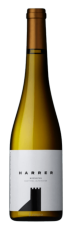

In [ ]:
input_name = 'path/to/folder/images_white_wines_clean/Harrer Riesling 2018\'.png'
img = plt.imread(input_name)

plt.imshow(img)
plt.axis('off')
plt.show()

**Tolerance**: group colors to limit the output and give a better visual representation. Based on a scale from 0 to 100. Where 0 won’t group any color and 100 will group all colors into one.

**Limit**: upper limit to the number of extracted colors presented in the output.

The obtained result will be in RGB color codes and their occurrence.

In [ ]:
colors_x = extcolors.extract_from_path(input_name, tolerance = 10, limit = 1000)
colors_x

([((21, 21, 21), 12401),
  ((223, 224, 228), 12139),
  ((141, 144, 150), 4433),
  ((102, 67, 0), 4133),
  ((193, 194, 199), 3985),
  ((136, 96, 0), 3646),
  ((91, 50, 14), 3608),
  ((191, 164, 67), 3229),
  ((40, 18, 1), 2799),
  ((168, 134, 2), 2572),
  ((220, 198, 77), 1981),
  ((203, 180, 1), 1336),
  ((57, 30, 2), 1336),
  ((181, 124, 56), 1140),
  ((112, 115, 120), 910),
  ((45, 46, 49), 604),
  ((163, 138, 54), 479),
  ((71, 50, 0), 324),
  ((148, 95, 37), 288),
  ((185, 158, 3), 181),
  ((70, 70, 74), 177),
  ((125, 108, 68), 128),
  ((147, 124, 59), 93),
  ((74, 63, 41), 83),
  ((233, 224, 210), 26),
  ((97, 85, 55), 22),
  ((194, 181, 142), 19),
  ((221, 209, 167), 14),
  ((46, 38, 20), 13),
  ((163, 159, 150), 11),
  ((125, 84, 38), 4)],
 94800)

In [ ]:
colors_x[0][1]

((223, 224, 228), 12139)

In [ ]:
colors_x[-1]
colors_x[0][0][-1]

colors = []

for i in colors_x[0]:
  if ((i[-1] / colors_x[-1]) < 0.01) & ((i[-1] / colors_x[-1]) > 0.0001): # 0.08 / 0.0012
    colors.append(i)

colors = tuple(colors)
colors

(((112, 115, 120), 910),
 ((45, 46, 49), 604),
 ((163, 138, 54), 479),
 ((71, 50, 0), 324),
 ((148, 95, 37), 288),
 ((185, 158, 3), 181),
 ((70, 70, 74), 177),
 ((125, 108, 68), 128),
 ((147, 124, 59), 93),
 ((74, 63, 41), 83),
 ((233, 224, 210), 26),
 ((97, 85, 55), 22),
 ((194, 181, 142), 19),
 ((221, 209, 167), 14),
 ((46, 38, 20), 13),
 ((163, 159, 150), 11))

Define a function to convert the RGB codes into HEX color codes with the rgb2hex library and create a DataFrame.

In [ ]:
def color_to_df(input):
    colors_pre_list = str(input).replace('([(','').split(', (')[0:12]
    df_rgb = [i.split('), ')[0] + ')' for i in colors_pre_list]
    df_percent = [i.split('), ')[1].replace(')','') for i in colors_pre_list]
    
    #convert RGB to HEX code
    df_color_up = [rgb2hex(int(i.split(", ")[0].replace("(","")),
                          int(i.split(", ")[1]),
                          int(i.split(", ")[2].replace(")",""))) for i in df_rgb]
    
    df = pd.DataFrame(zip(df_color_up, df_percent), columns = ['c_code','occurence'])
    return df

df_color = color_to_df(colors)
df_color

c_code occurence
0   #707378       910
1   #2D2E31       604
2   #A38A36       479
3   #473200       324
4   #945F25       288
5   #B99E03       181
6   #46464A       177
7   #7D6C44       128
8   #937C3B        93
9   #4A3F29        83
10  #E9E0D2        26
11  #615537        22

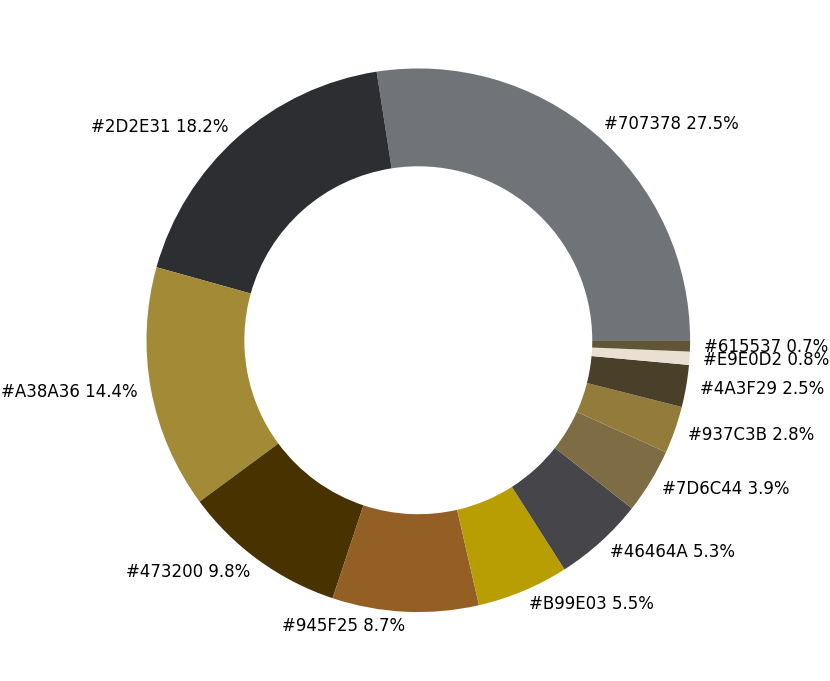

In [ ]:
list_color = list(df_color['c_code'])
list_precent = [int(i) for i in list(df_color['occurence'])]
text_c = [c + ' ' + str(round(p*100/sum(list_precent),1)) +'%' for c, p in zip(list_color, list_precent)]
fig, ax = plt.subplots(figsize=(90,90),dpi=10)
wedges, text = ax.pie(list_precent,
                      labels= text_c,
                      labeldistance= 1.05, # 1.05
                      colors = list_color,
                      textprops={'fontsize': 120, 'color':'black'},
                     )

plt.setp(wedges, width=0.3)

#create space in the center
plt.setp(wedges, width=0.36)

ax.set_aspect("equal")
fig.set_facecolor('white')
plt.show()

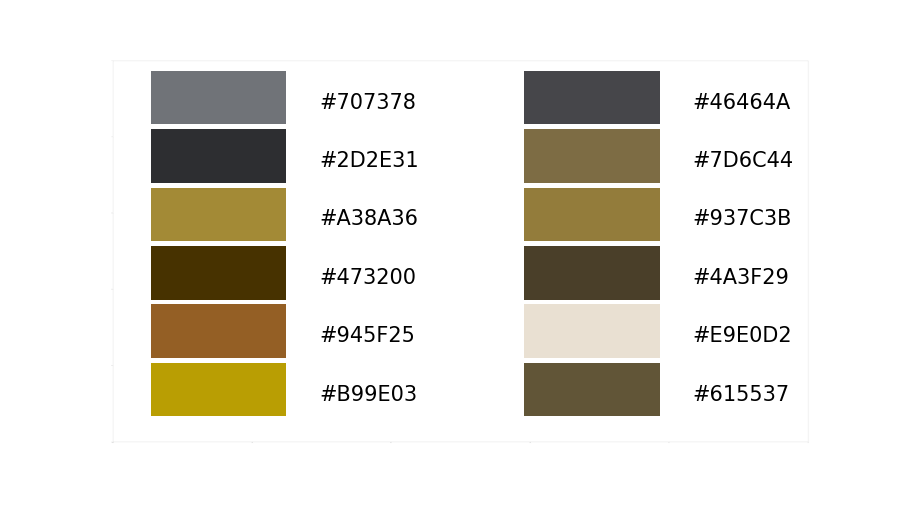

In [ ]:
#create background color
fig, ax = plt.subplots(figsize=(192,108),dpi=10)
fig.set_facecolor('white')
plt.savefig('bg.png')
plt.close(fig)

#create color palette
bg = plt.imread('bg.png')
fig = plt.figure(figsize=(90, 90), dpi = 10)
ax = fig.add_subplot(1,1,1)

x_posi, y_posi, y_posi2 = 320, 25, 25
for c in list_color:
    if  list_color.index(c) <= 5:
        y_posi += 125
        rect = patches.Rectangle((x_posi, y_posi), 290, 115, facecolor = c)
        ax.add_patch(rect)
        ax.text(x = x_posi+360, y = y_posi+80, s = c, fontdict={'fontsize': 150})
    else:
        y_posi2 += 125
        rect = patches.Rectangle((x_posi + 800, y_posi2), 290, 115, facecolor = c)
        ax.add_artist(rect)
        ax.text(x = x_posi+1160, y = y_posi2+80, s = c, fontdict={'fontsize': 150})
        
ax.axis('off')
plt.imshow(bg)
plt.tight_layout()

In [ ]:
bg = plt.imread('bg.png')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(160,120), dpi = 200)

#donut plot
wedges, text = ax1.pie(list_precent,
                      #labels= text_c,
                      #labeldistance= 1.05,
                      colors = list_color,
                      textprops={'fontsize': 160, 'color':'black'})

plt.setp(wedges, width=0.3)

#add image in the center of donut plot
imagebox = OffsetImage(img, zoom=4.1)
ab = AnnotationBbox(imagebox, (0, 0))
ax1.add_artist(ab)

#color palette
x_posi, y_posi, y_posi2 = 160, -170, -170
for c in list_color:
    if list_color.index(c) <= 5:
        y_posi += 180
        rect = patches.Rectangle((x_posi, y_posi), 360, 160, facecolor = c)
        ax2.add_patch(rect)
        ax2.text(x = x_posi+400, y = y_posi+100, s = c, fontdict={'fontsize': 190})
    else:
        y_posi2 += 180
        rect = patches.Rectangle((x_posi + 1000, y_posi2), 360, 160, facecolor = c)
        ax2.add_artist(rect)
        ax2.text(x = x_posi+1400, y = y_posi2+100, s = c, fontdict={'fontsize': 190})

ax2.axis('off')
fig.set_facecolor('white')
plt.imshow(bg)       
plt.tight_layout()